In [4]:
import pandas
import numpy
import matplotlib.pyplot as plt
from Bio import SeqIO
import re
import coralme
plt.rcParams['svg.fonttype'] = 'none'
pandas.set_option('display.max_colwidth', None)
%load_ext autoreload
%autoreload 2


## Naive model

In [5]:
model = coralme.io.pickle.load_pickle_me_model("./pputidame/MEModel-step3-pputida-TS-UPF36.pkl")

Set parameter Username
Academic license - for non-commercial use only - expires 2025-09-03
Read LP format model from file /tmp/tmpokidcb0j.lp
Reading time = 0.00 seconds
: 0 rows, 0 columns, 0 nonzeros
Read LP format model from file /tmp/tmp8ys21lps.lp
Reading time = 0.01 seconds
: 2162 rows, 5896 columns, 23426 nonzeros
Read LP format model from file /tmp/tmpbulxdapa.lp
Reading time = 0.01 seconds
: 2166 rows, 5894 columns, 23388 nonzeros


### M9

In [15]:
for r in model.reactions.query("^EX_"):
    r.lower_bound = 0

In [16]:
medium = pandas.read_csv("./media/M9.txt",index_col=0,header=None,comment="#")[1]
for r,b in medium.items():
    model.reactions.get_by_id(r).lower_bound = -b

In [17]:
model.optimize(max_mu=1.0)

Iteration	 Solution to check	Solver Status
---------	------------------	-------------
        1	0.5000000000000000	Optimal
        2	0.7500000000000000	Not feasible
        3	0.6250000000000000	Optimal
        4	0.6875000000000000	Not feasible
        5	0.6562500000000000	Not feasible
        6	0.6406250000000000	Not feasible
        7	0.6328125000000000	Optimal
        8	0.6367187500000000	Not feasible
        9	0.6347656250000000	Not feasible
       10	0.6337890625000000	Optimal
       11	0.6342773437500000	Optimal
       12	0.6345214843750000	Optimal
       13	0.6346435546875000	Not feasible
       14	0.6345825195312500	Optimal
       15	0.6346130371093750	Optimal
       16	0.6346282958984375	Optimal
       17	0.6346359252929688	Not feasible
       18	0.6346321105957031	Not feasible
       19	0.6346302032470703	Optimal
       20	0.6346311569213867	Optimal


True

In [20]:
from coralme.util.flux_analysis import exchange_single_model,flux_based_reactions
exchange_single_model(model).sort_values("flux",ascending=False).head(20)

,name,reaction,lower_bound,upper_bound,flux
id,,,,,
EX_h2o_e,,1.0 h2o_e <=>,-100,999999.0,4.195663e+01
EX_co2_e,,1.0 co2_e -->,0,999999.0,2.472880e+01
EX_h_e,,1.0 h_e <=>,-100,999999.0,6.539237e+00
biomass_dilution,,1.0 biomass -->,mu,mu,6.346312e-01
EX_ac_e,,1.0 ac_e -->,0,999999.0,3.902820e-01
DM_5drib_c,,1.0 5drib_c -->,0.0,999999.0,4.307514e-04
DM_tripeptide_c,,1.0 tripeptide_c -->,0.0,999999.0,1.858187e-04
DM_amob_c,,1.0 amob_c -->,0.0,999999.0,1.477059e-04
DM_doxopa_c,,1.0 doxopa_c -->,0.0,999999.0,1.415227e-04


In [17]:
model.solution.to_frame().to_csv("./predictions/KT2440-UPF36-M9.csv")

## M-model

In [1]:
import cobra
gem = cobra.io.load_json_model("./me_model_files/inputs/m_model.json")

Set parameter Username
Academic license - for non-commercial use only - expires 2025-09-03


### M9

In [14]:
for r in gem.reactions.query("^EX_"):
    r.lower_bound = 0

In [15]:
medium = pandas.read_csv("./media/M9.txt",index_col=0,header=None,comment="#")[1]
for r,b in medium.items():
    gem.reactions.get_by_id(r).lower_bound = -b

In [16]:
gem.optimize().to_frame().to_csv("./predictions/KT2440-MMODEL-M9.csv")

# Comparison

In [17]:
gem.solution = gem.optimize()

In [32]:
MetabolicFluxes = pandas.concat([gem.solution.to_frame()[["fluxes"]].rename(columns={"fluxes":"m"}),
               pandas.Series(model.get_metabolic_flux()).to_frame().rename(columns={0:"me"})],axis=1)

Building reaction dictionary...                                            : 100.0%|██████████|  2563/ 2563 [00:00<00:00]
Processing ME-model Reactions...                                           : 100.0%|██████████| 14414/14414 [00:00<00:00]


/home/jt/miniconda3/envs/coralme-1.1.0/lib/python3.10/site-packages/pandas-1.5.1-py3.10-linux-x86_64.egg/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log10
  result = func(self.values, **kwargs)


<Axes: xlabel='m', ylabel='me'>

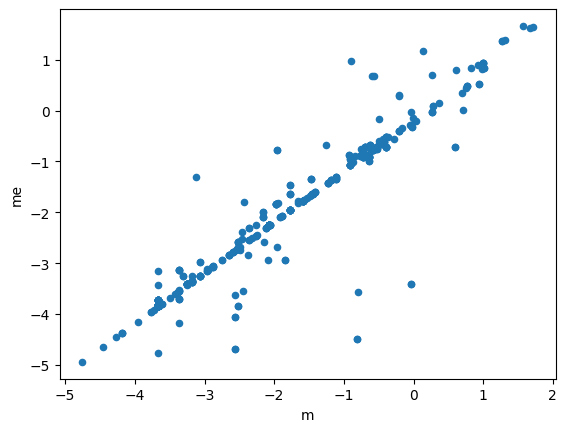

In [37]:
numpy.log10(MetabolicFluxes.dropna()).plot.scatter(x="m",y="me")

### FVA

In [41]:
from cobra.flux_analysis import flux_variability_analysis

In [52]:
m_fva = flux_variability_analysis(gem, reaction_list=gem.reactions,fraction_of_optimum=1.0)

/home/jt/miniconda3/envs/coralme-1.1.0/lib/python3.10/site-packages/cobra-0.26.3-py3.10.egg/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
Could not get flux for reaction AKGDa, setting it to NaN. This is usually due to numerical instability.


<Axes: ylabel='Frequency'>

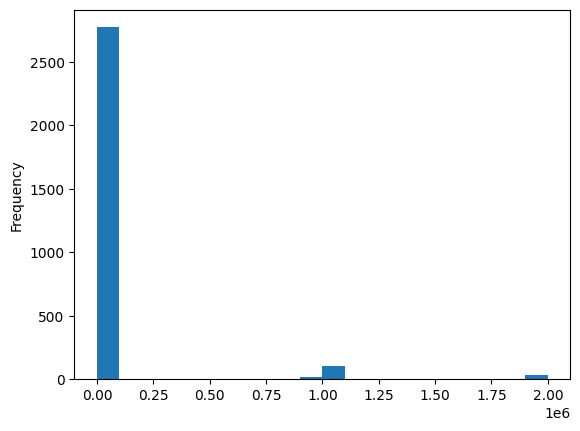

In [51]:
(m_fva["maximum"] - m_fva["minimum"]).plot.hist(bins=20)

In [ ]:
me_fva = model.fva(reaction_list=[r for r in model.reactions if isinstance(r,coralme.core.reaction.MetabolicReaction)],
                   fraction_of_optimum=1.0)

Running FVA for 7310 reactions. Maximum growth rate fixed to 0.634631


<Axes: ylabel='Frequency'>

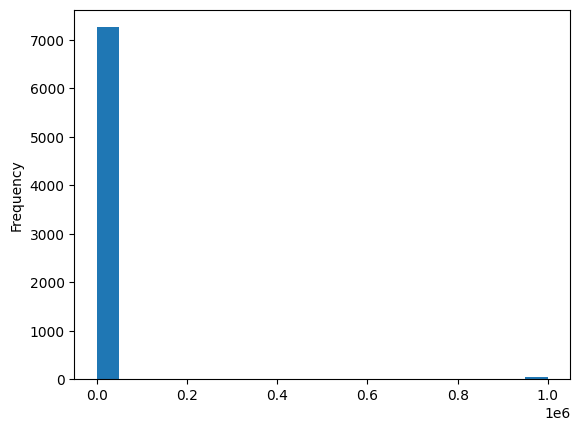

In [59]:
(me_fva["maximum"] - me_fva["minimum"]).plot.hist(bins=20)